# Generate FWE Corrected R-Squared Map 
- Using maximum statistic correction
- Notes on controlling a regression:
    - Adding covariates to a regression will 'control' for them, but will almost always increase the R-squared. 
    - To 'remove' a covariate from the regression, you will want to regress a nuisance covariate OUT of the covariate of interest. 
        - This means your regressor will become the residuals from the regression of cov_1 ~ nuisance_cov1

Import Niftis
- These are EXPECTED to have subject IDs which are IDENTICAL to the subject IDs that go in the covarite DF column names below
- This is expected to ultimately have the form:

|        | Subject 1 | Subject 2 | Subject 3 | Subject 4 | Subject 5 | Subject 6 | Subject 7 | Subject 8 | Subject 9 | Subject 10 | ... | Subject 40 | Subject 41 | Subject 42 | Subject 43 | Subject 45 | Subject 46 | Subject 47 | Subject 48 | Subject 49 | Subject 50 |
|----------|------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|------------|-----|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| Voxel 1     | 3          | 4         | 7         | 2         | 2         | 2         | 9         | 4         | 7         | 5          | ... | 5           | 2           | 7           | 7           | 3           | 8           | 8           | 1           | 1           | 3           |
| . . .      | ...         | ...        | ...         | ...         | ...         | ...         | ...         | ...         | ...         | ...          | ... | ...           | ...           | ...           | ...           | ...           | ...           | 7           | ...           | ...           | ...           |
| Voxel N     | 2          | 1         | 0         | 1         | 3         | 4         | 9         | 5         | 8         | 6          | ... | 6           | 3           | 8           | 8           | 4           | 9           | 9           | 2           | 2           | 4           |

In [34]:
import_path = '/Users/cu135/Dropbox (Partners HealthCare)/studies/atrophy_seeds_2023/shared_analysis/niftis_for_elmira/smoothed_atrophy_seeds'
file_target = '*/*/unthresholded_tissue_segment_z_scores/*cerebrospinal_fluid_generated_nifti_no*'

In [35]:
from calvin_utils.file_utils.import_functions import GiiNiiFileImport
giinii = GiiNiiFileImport(import_path=import_path, file_column=None, file_pattern=file_target)
nimg_df = giinii.run()
nimg_df

Attempting to import from: /Users/cu135/Dropbox (Partners HealthCare)/studies/atrophy_seeds_2023/shared_analysis/niftis_for_elmira/smoothed_atrophy_seeds/*/*/unthresholded_tissue_segment_z_scores/*cerebrospinal_fluid_generated_nifti_no*


,sub-0015_cerebrospinal_fluid_generated_nifti_no_nan.nii,sub-0012_cerebrospinal_fluid_generated_nifti_no_nan.nii,sub-0024_cerebrospinal_fluid_generated_nifti_no_nan.nii,sub-0023_cerebrospinal_fluid_generated_nifti_no_nan.nii,sub-0048_cerebrospinal_fluid_generated_nifti_no_nan.nii,sub-0046_cerebrospinal_fluid_generated_nifti_no_nan.nii,sub-0041_cerebrospinal_fluid_generated_nifti_no_nan.nii,sub-0022_cerebrospinal_fluid_generated_nifti_no_nan.nii,sub-0025_cerebrospinal_fluid_generated_nifti_no_nan.nii,sub-0013_cerebrospinal_fluid_generated_nifti_no_nan.nii,...,sub-0010_cerebrospinal_fluid_generated_nifti_no_nan.nii,sub-0032_cerebrospinal_fluid_generated_nifti_no_nan.nii,sub-0035_cerebrospinal_fluid_generated_nifti_no_nan.nii,sub-0003_cerebrospinal_fluid_generated_nifti_no_nan.nii,sub-0004_cerebrospinal_fluid_generated_nifti_no_nan.nii,sub-0050_cerebrospinal_fluid_generated_nifti_no_nan.nii,sub-0005_cerebrospinal_fluid_generated_nifti_no_nan.nii,sub-0002_cerebrospinal_fluid_generated_nifti_no_nan.nii,sub-0034_cerebrospinal_fluid_generated_nifti_no_nan.nii,sub-0033_cerebrospinal_fluid_generated_nifti_no_nan.nii
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Fix names

In [36]:
pre = 'sub-'
post = '_cerebro'

In [37]:
nimg_df = giinii.splice_colnames(nimg_df, pre, post)
nimg_df

,0015,0012,0024,0023,0048,0046,0041,0022,0025,0013,...,0010,0032,0035,0003,0004,0050,0005,0002,0034,0033
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Import Covariates
- These are EXPECTED to have subject IDs which are IDENTICAL to the subject IDs that go in the neuroimaging DF column names above
- Do NOT enter strings for categorical variables. All data must be numerical

|        | Subject 1 | Subject 2 | Subject 3 | Subject 4 | Subject 5 | Subject 6 | Subject 7 | Subject 8 | Subject 9 | Subject 10 | ... | Subject 40 | Subject 41 | Subject 42 | Subject 43 | Subject 45 | Subject 46 | Subject 47 | Subject 48 | Subject 49 | Subject 50 |
|----------|------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|------------|-----|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| Var1     | 3          | 4         | 7         | 2         | 2         | 2         | 9         | 4         | 7         | 5          | ... | 5           | 2           | 7           | 7           | 3           | 8           | 8           | 1           | 1           | 3           |
| Var2     | 45         | 32        | 1         | 0         | 2         | 3         | 8         | 3         | 6         | 4          | ... | 4           | 1           | 6           | 6           | 2           | 7           | 7           | 0           | 0           | 2           |
| Var3     | 2          | 1         | 0         | 1         | 3         | 4         | 9         | 5         | 8         | 6          | ... | 6           | 3           | 8           | 8           | 4           | 9           | 9           | 2           | 2           | 4           |


In [38]:
input_csv_path = '/Users/cu135/Dropbox (Partners HealthCare)/studies/atrophy_seeds_2023/metadata/experiment_metadata/voxelwise_regression.csv'

In [39]:
import pandas as pd
data_df = pd.read_csv(input_csv_path, index_col=0)
data_df = data_df.dropna(axis=1)
data_df

,1,2,4,5,6,7,8,9,10,11,...,39,40,41,42,43,45,46,47,49,50
Q1,2,4,3.67,2,1.33,2,5,5.33,5,6,...,3.67,3.67,3.33,3.67,6.33,5,5,5,1.33,3
Q2,0,0,0.00,0,0.00,0,0,1.00,0,0,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0.00,0
Q3,1,0,1.00,0,0.00,0,1,0.00,0,1,...,0.00,1.00,1.00,0.00,1.00,0,2,0,1.00,0
Q4,3,4,7.00,2,2.00,2,9,4.00,7,5,...,6.00,5.00,2.00,7.00,7.00,3,8,8,1.00,3
Q5,0,0,0.00,0,0.00,0,0,1.00,0,0,...,0.00,0.00,0.00,0.00,0.00,0,1,0,1.00,0
Q6,0,0,0.00,0,0.00,0,0,0.00,0,0,...,0.00,0.00,0.00,1.00,0.00,0,1,1,0.00,0
Q7,0,0,0.00,0,0.00,0,1,0.00,0,8,...,0.00,0.00,0.00,2.00,0.00,0,5,1,0.00,0
Q8,0,5,5.00,0,0.00,3,3,2.00,2,3,...,3.00,6.00,2.00,5.00,8.00,1,7,9,3.00,1
Q9,0,0,0.00,0,0.00,0,0,0.00,0,0,...,0.00,0.00,0.00,0.00,0.00,0,1,0,0.00,0
Q10,0,0,0.00,0,0.00,0,0,0.00,0,0,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0.00,0


Choose Rows to Keep

In [40]:
rows_to_keep_list = ['Q4']

In [41]:
data_df=data_df.loc[rows_to_keep_list,:]
data_df

,1,2,4,5,6,7,8,9,10,11,...,39,40,41,42,43,45,46,47,49,50
Q4,3,4,7.0,2,2.0,2,9,4.0,7,5,...,6.0,5.0,2.0,7.0,7.0,3,8,8,1.0,3


Name of the row with outcomes
- If None, will regress covariates on voxels. 
- If you are interested in how voxel values relate to an outcome, make sure you have this row in your DF and name it below. 

In [42]:
outcome_row = 'Q4'

Where do you want to save the results to?

In [43]:
out_dir = '/Users/cu135/Dropbox (Partners HealthCare)/studies/commutative_regression/voxels~q4'

Is there a particular mask you want to use?
- MUST match the resolution of voxelwise data being analyzed. 
- If you set None, the voxelwise data will be used for thresholding. 
    - Values below mask_threshold (float) will be set to 0. 
- Warning: bad masking may result in failed experiments. Erroneous voxels outside the brain will influence the correction. 

In [44]:
mask_path = '/Users/cu135/hires_backdrops/MNI152_T1_2mm_brain_mask.nii'
mask_threshold = 0

Choose Max Stat Correction Method
- None | pseudo_var_smooth | var_smooth
- None performs voxelwise max-stat FWE correction, which is the most stringent FWE correction right after Bonferroni. 

In [45]:
max_stat_method = None #'pseudo_var_smooth'

In [46]:
from calvin_utils.permutation_analysis_utils.lin_reg_fwe import CalvinFWEMap
calvin_fwe = CalvinFWEMap(neuroimaging_dataframe=nimg_df, variable_dataframe=data_df, 
                          mask_threshold=mask_threshold, 
                          mask_path=mask_path,
                          max_stat_method=max_stat_method,
                          outcome_row=outcome_row,
                          out_dir=out_dir)
calvin_fwe.run(n_permutations=2, debug=False)

Using statsmodels for voxelwise calculation of T-values of voxel ~ covariates


Visualize the FWE Corrected Image


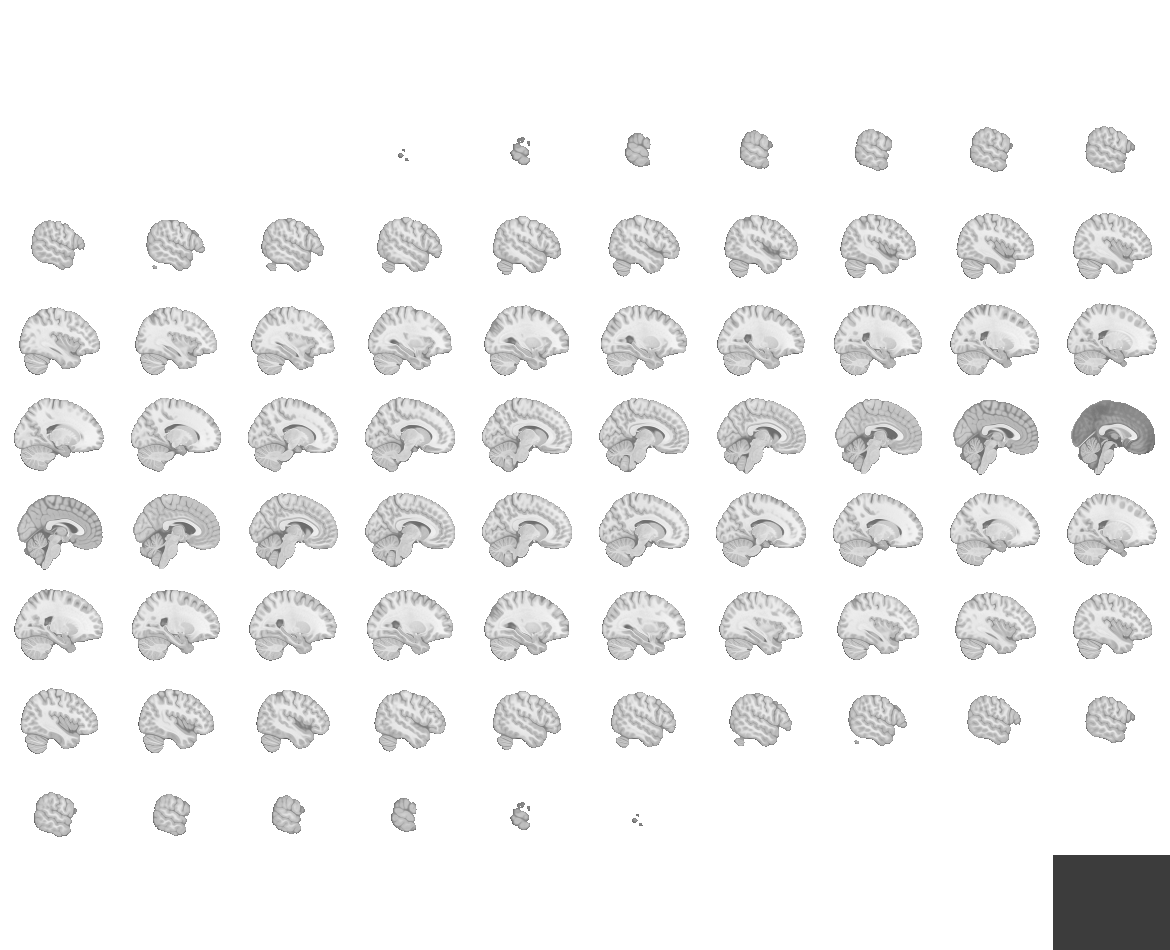
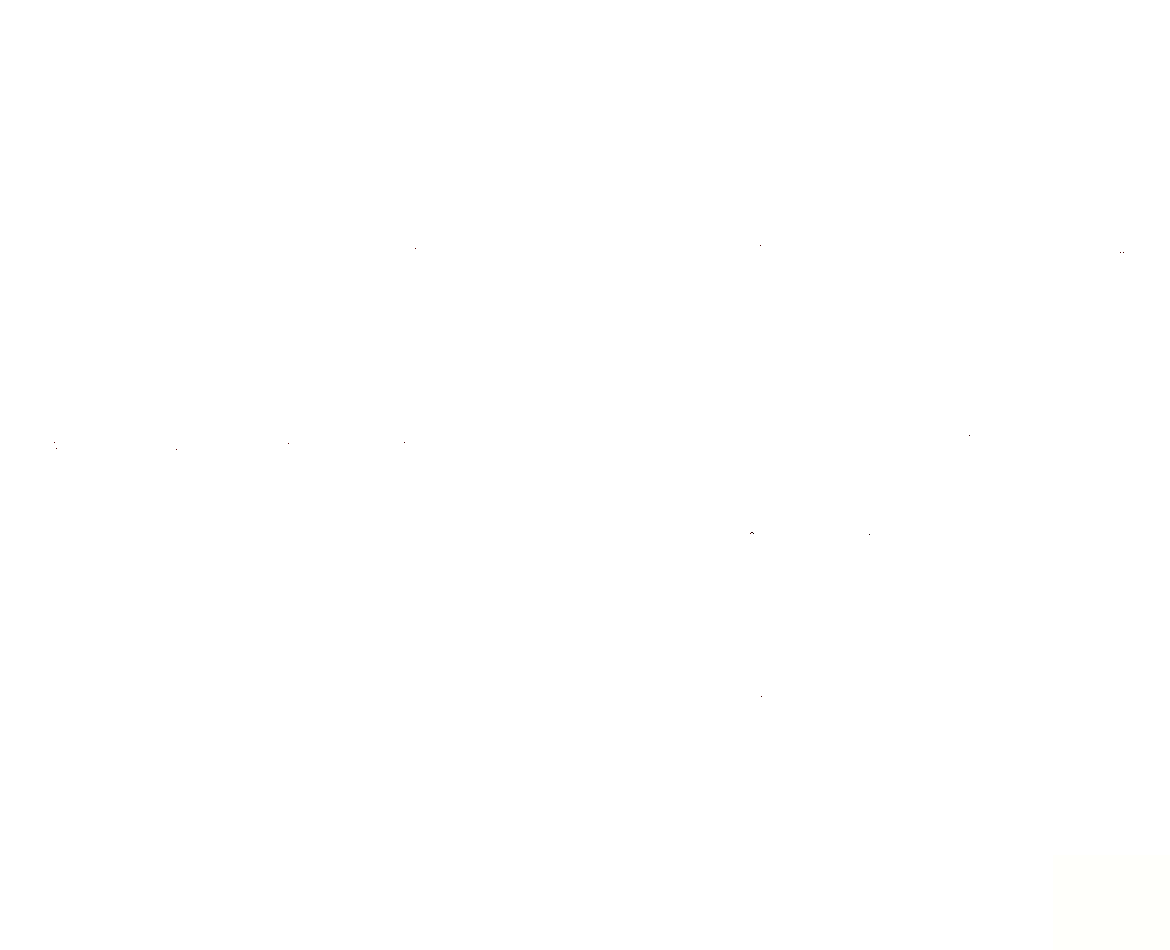

In [ ]:
calvin_fwe.corrected_img

Visualize the P-Values (FWE Corrected) Used to Correct the Above


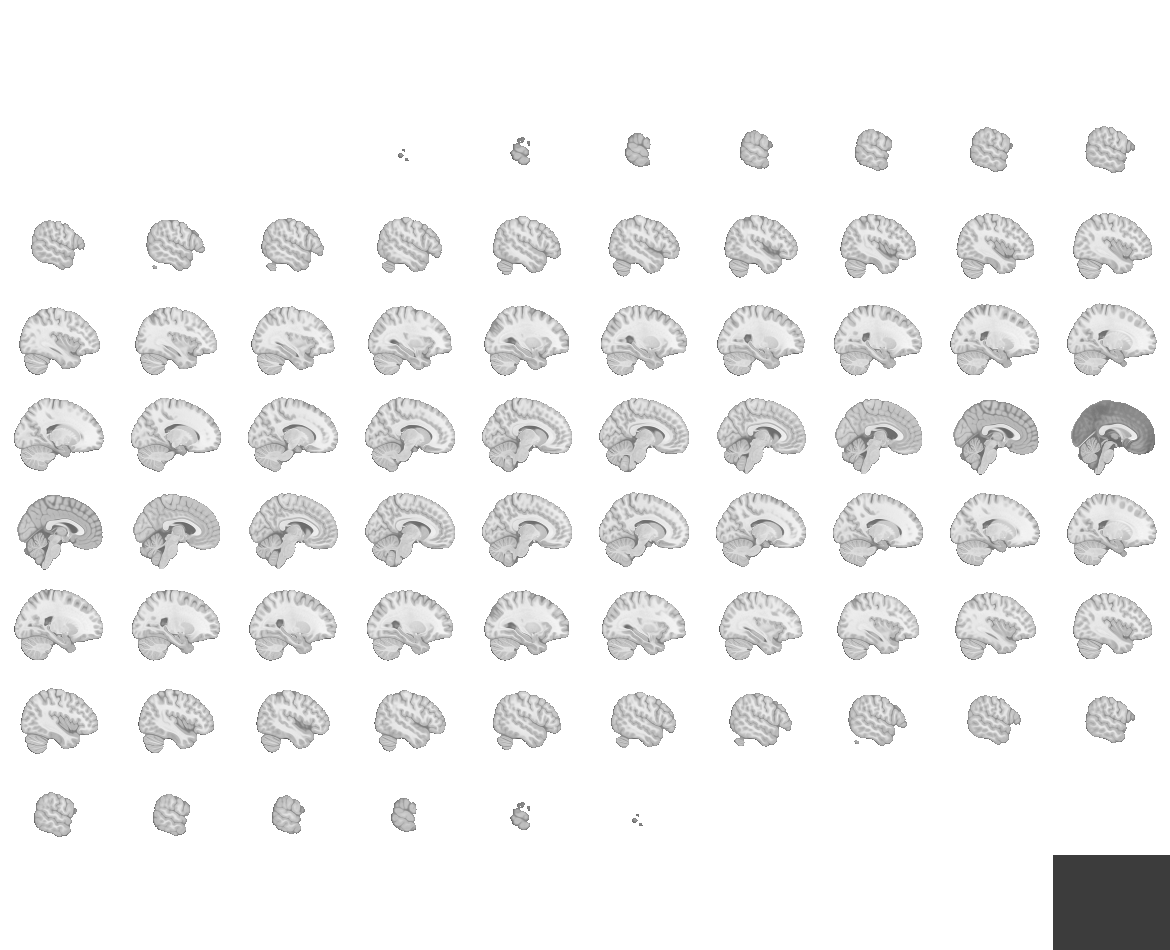
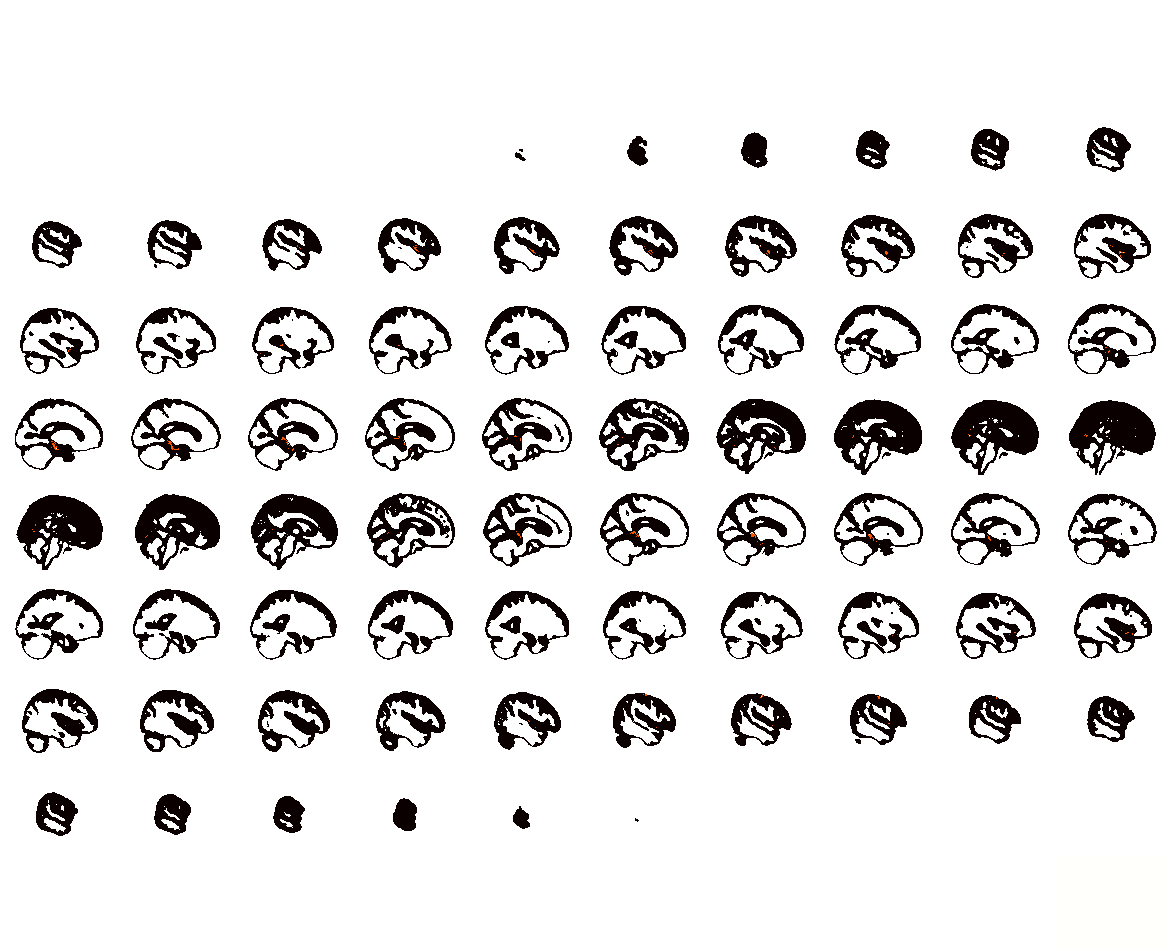

In [ ]:
calvin_fwe.p_img

Visualize the Uncorrected Image


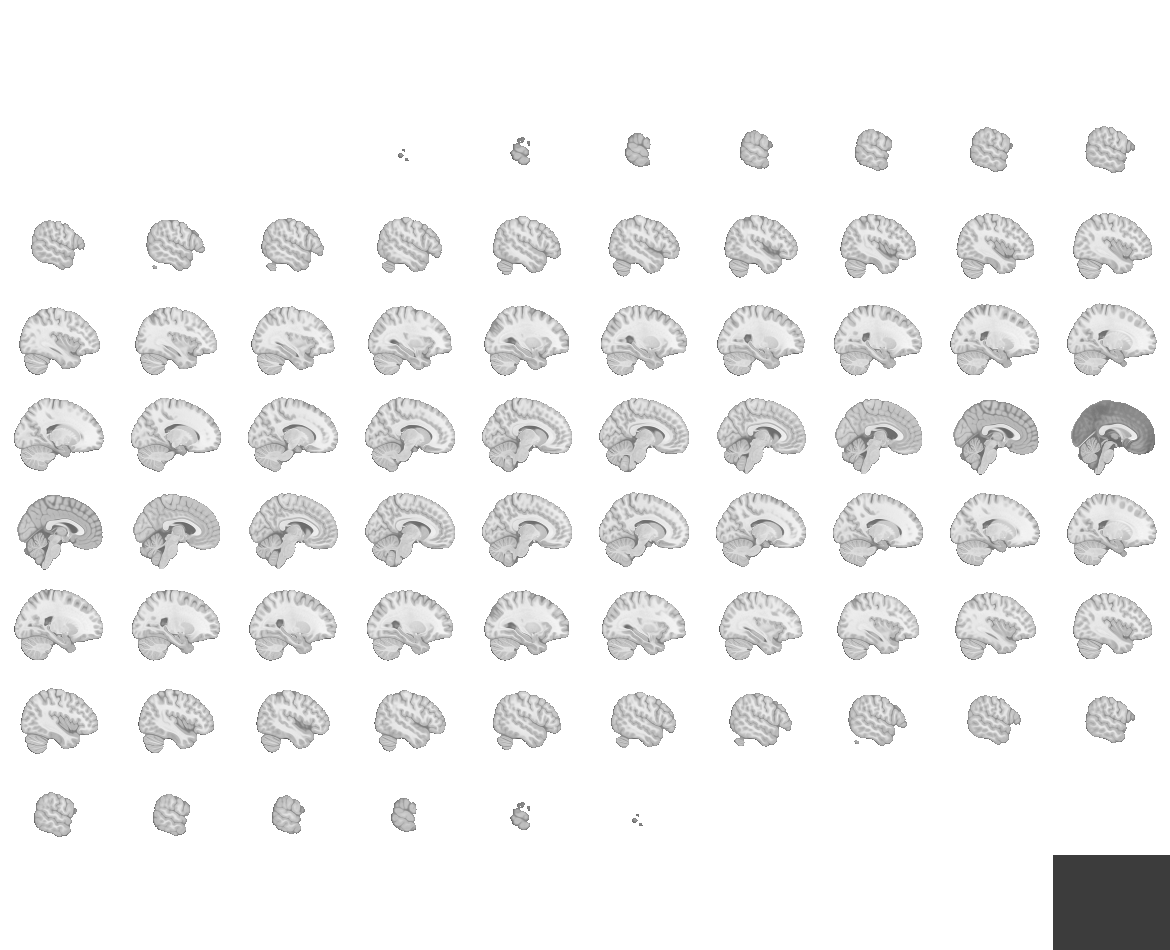
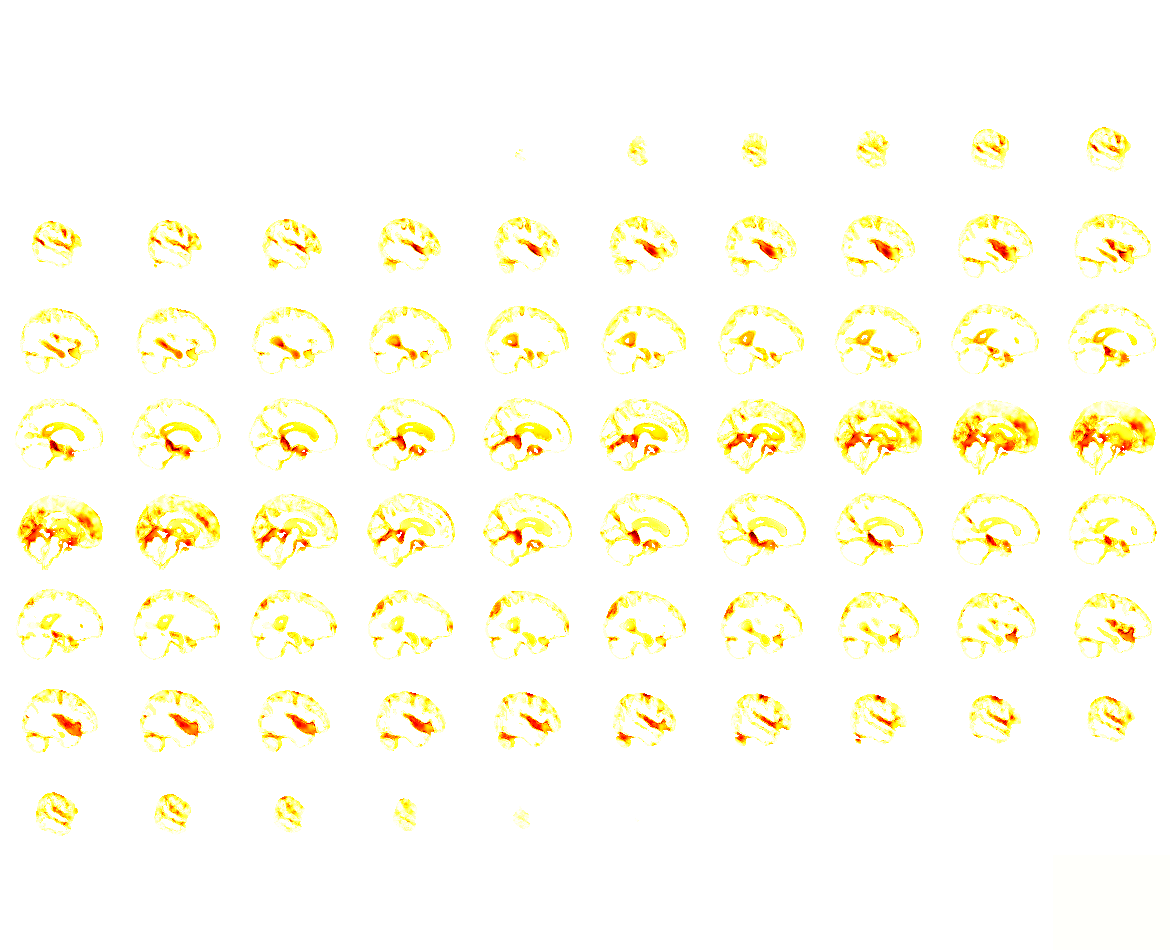

In [ ]:
calvin_fwe.uncorrected_img

Visualize t values of last coefficient


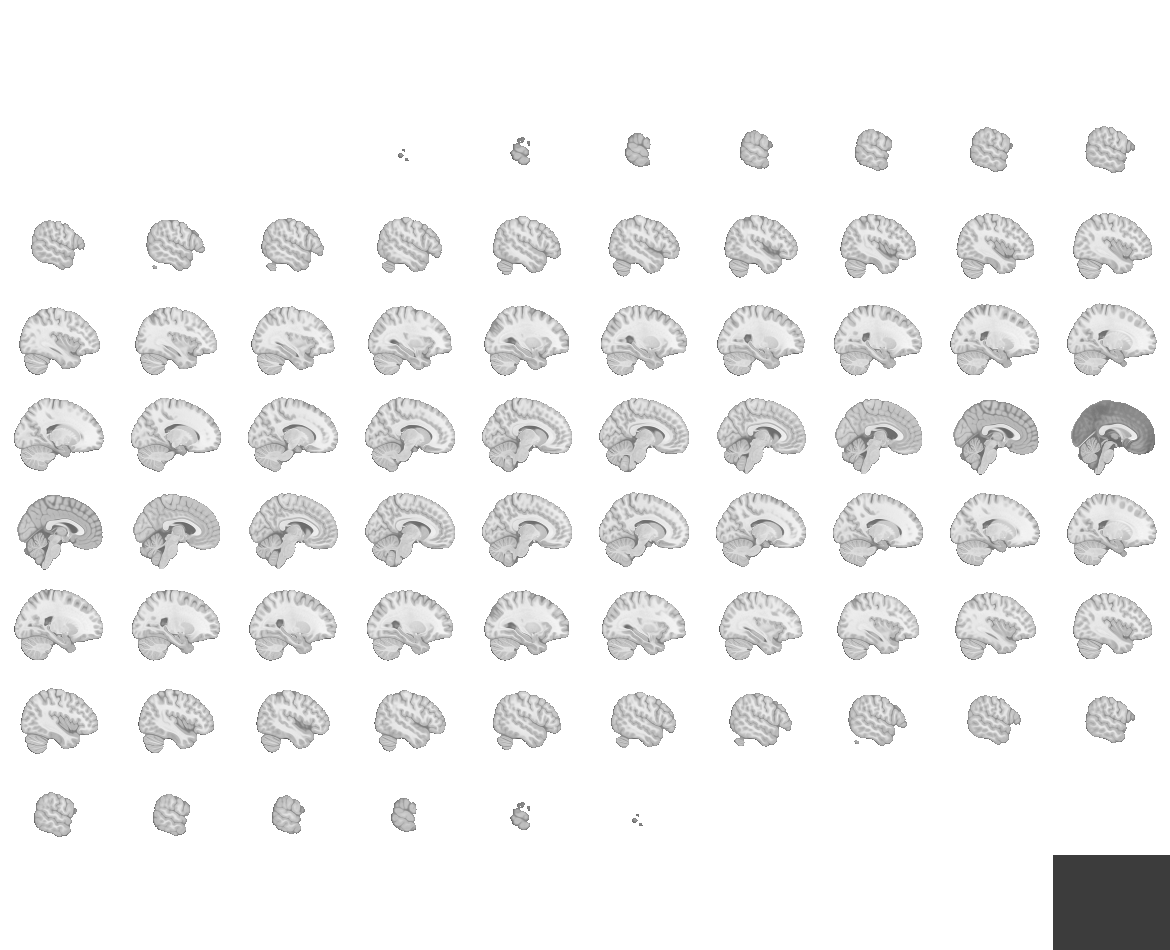
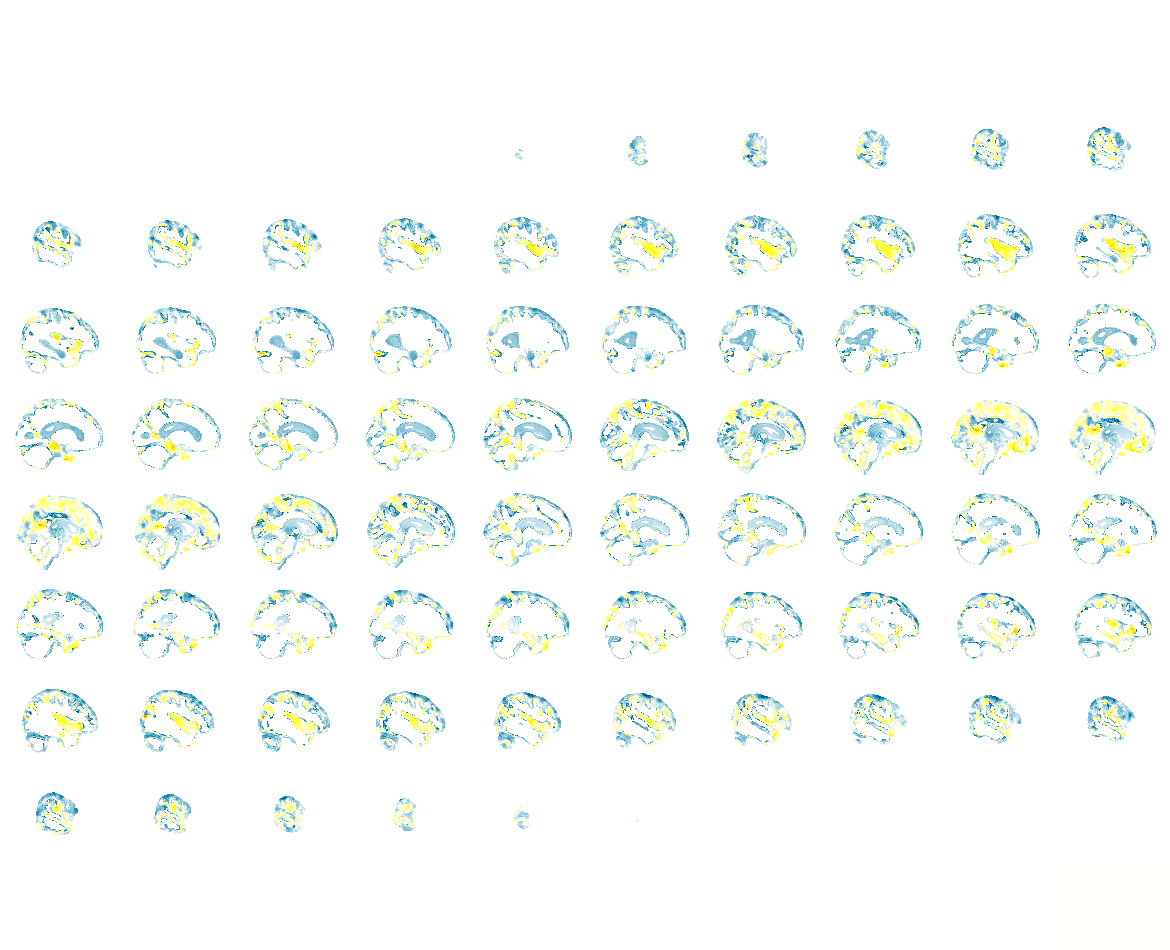

In [ ]:
calvin_fwe.final_t_value